## Regression: Boston Housing Data
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

** Dataset Information: **

506 Boston housing information including value of houses

** Attribute Information: (13 features and 1 class)**

1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
                 
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
                 
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
                 
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

** Objective of this project **

predict value of house (MEDV) based on the other features

## Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
# Load Data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(url, delim_whitespace=True, names=names)

In [3]:
# Inspect Data
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

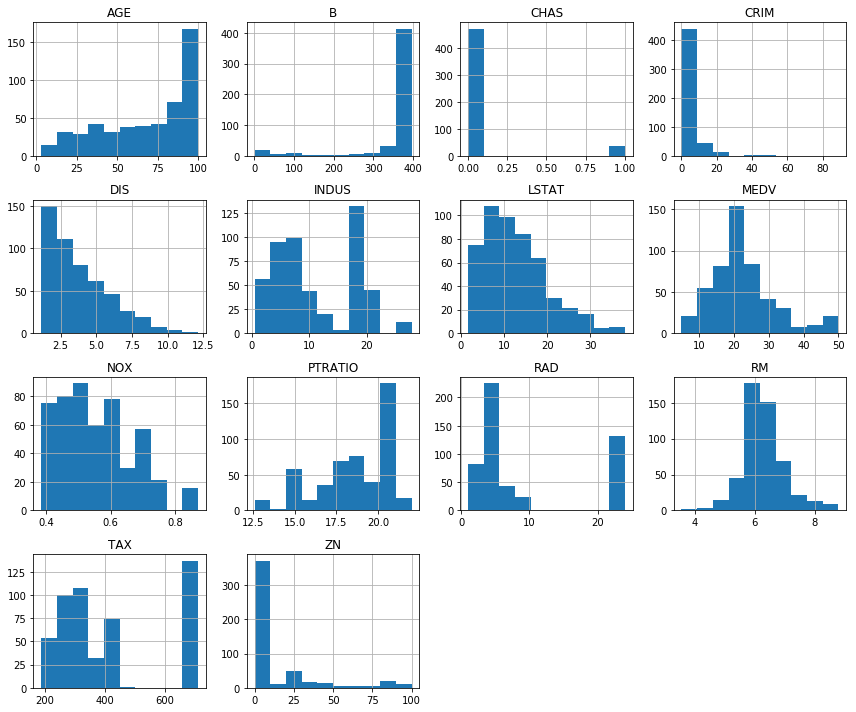

In [5]:
_ = df.hist(figsize=(12,10))
plt.tight_layout()

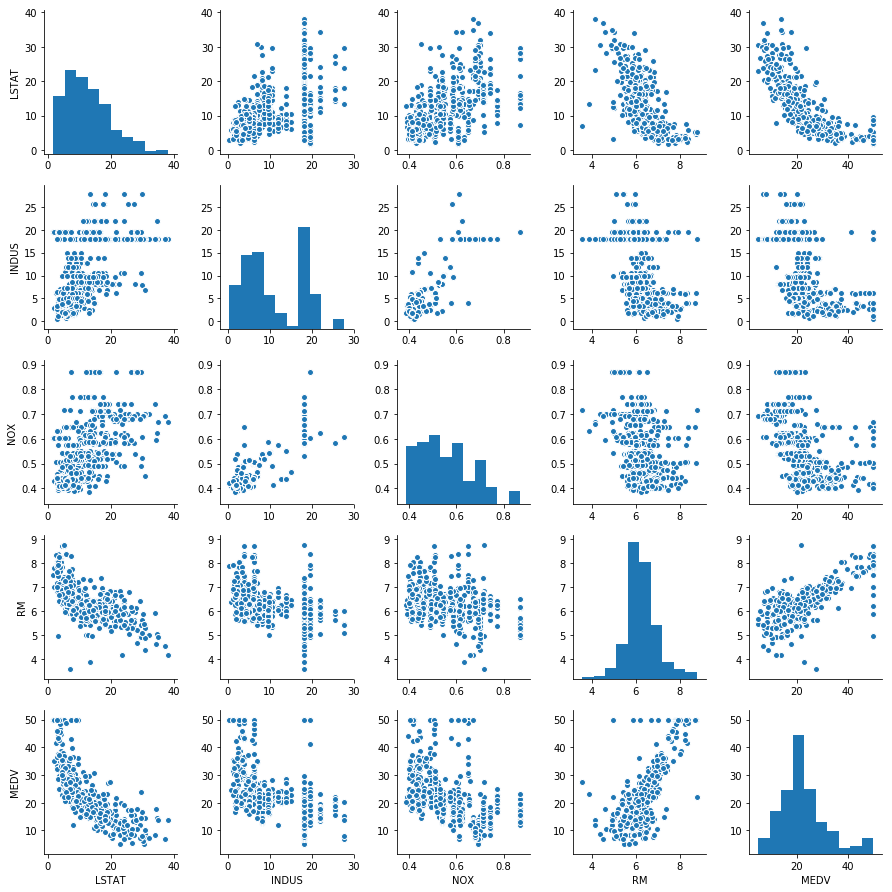

In [6]:
sns.pairplot(df[['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']], size=2.5)
plt.tight_layout()

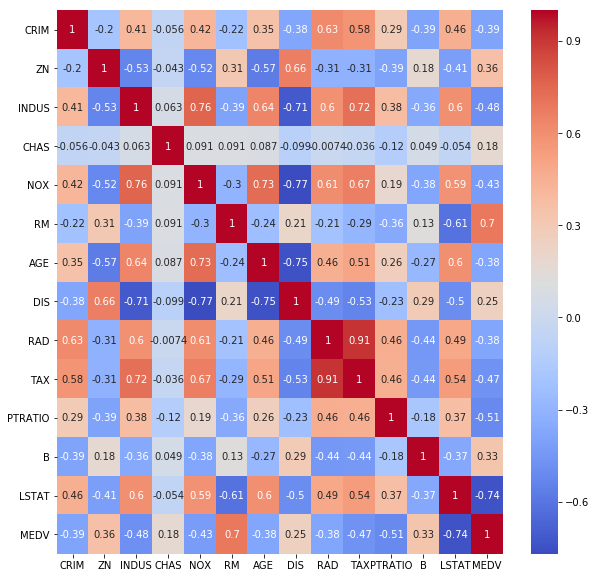

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

## Data preprocessing

In [3]:
seed = 101 #random seed for reproducibility
np.random.seed(seed)

** Split Features & Class (or target) **

In [4]:
X = df.drop('MEDV', axis=1).values
y = df['MEDV'].values
print(X.shape,y.shape)

(506, 13) (506,)


** Split Train Test Sets **

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


** Scale features **

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [36]:
#sc_y = StandardScaler()
#y_train = sc_y.fit_transform(y_train.reshape(-1, 1))
#y_test = sc_y.transform(y_test.reshape(-1, 1))

## Baseline Model

#### XGBoost: best ML algorithm

In [7]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
#train model
model = XGBRegressor(n_estimators=100,random_state=seed)
model.fit(X_train, y_train)
#evaluate model
print('XGBoost:')
print('MSE of train set: {:0.3f}'.format(mean_squared_error(y_train,model.predict(X_train))))
print('R^2 of train set: {:0.3f}'.format(r2_score(y_train,model.predict(X_train))))
print('MSE of test set: {:0.3f}'.format(mean_squared_error(y_test,model.predict(X_test))))
print('R^2 of test set: {:0.3f}'.format(r2_score(y_test,model.predict(X_test))))

XGBoost:
MSE of train set: 2.176
R^2 of train set: 0.972
MSE of test set: 14.330
R^2 of test set: 0.872


#### Baseline MLP Model

In [8]:
# Import libraries
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam,SGD
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold,GridSearchCV,cross_val_score

Using TensorFlow backend.


In [13]:
K.clear_session()
np.random.seed(seed) 
# train (and evaluate) model
model = Sequential()
model.add(Dense(60, input_shape=(X_train.shape[1],), activation='relu'))                    
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), 
                    epochs=100, verbose=0)
#evaluate model
print('Baseline model:')
print('MSE of train set: {:0.3f}'.format(mean_squared_error(y_train,model.predict(X_train))))
print('R^2 of train set: {:0.3f}'.format(r2_score(y_train,model.predict(X_train))))
print('MSE of test set: {:0.3f}'.format(mean_squared_error(y_test,model.predict(X_test))))
print('R^2 of test set: {:0.3f}'.format(r2_score(y_test,model.predict(X_test))))

Baseline model:
MSE of train set: 4.927
R^2 of train set: 0.936
MSE of test set: 18.060
R^2 of test set: 0.839


dict_keys(['val_loss', 'loss'])


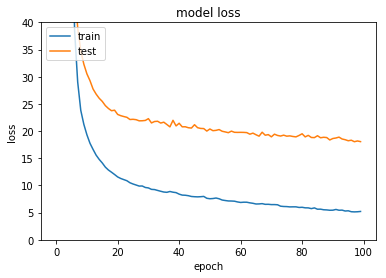

In [14]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0,40])
plt.show()

## Parameter Tuning
try to improve model to defeat the scores of XGBoost

#### Batch_size

In [15]:
# define a model
def create_model():
    model = Sequential()    
    model.add(Dense(60, input_shape=(X_train.shape[1],), activation='relu'))                    
    model.add(Dense(60, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Grid Search
K.clear_session()
np.random.seed(seed)
estimator = KerasRegressor(build_fn=create_model, nb_epoch=100, verbose=0)
kfold = KFold(n_splits=5, random_state=seed)
batch_size = [8,16,32,64]
param_grid = dict(batch_size=batch_size)
grid = GridSearchCV(estimator, param_grid=param_grid, cv=kfold,verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# GS Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    
print("Best: {:.3f} using {}" .format(grid_result.best_score_, grid_result.best_params_))

-13.613735 (3.397180) with: {'batch_size': 8}
-18.726755 (5.786346) with: {'batch_size': 16}
-30.483270 (10.936623) with: {'batch_size': 32}
-89.737670 (22.960414) with: {'batch_size': 64}
Best: -13.614 using {'batch_size': 8}


#### Initializer

In [16]:
# define a model
def create_model(init_mode='glorot_uniform'):
    model = Sequential()    
    model.add(Dense(60, kernel_initializer=init_mode,
                    input_shape=(X_train.shape[1],), activation='relu'))                    
    model.add(Dense(60, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(30, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Grid Search
K.clear_session()
np.random.seed(seed)
estimator = KerasRegressor(build_fn=create_model, batch_size=8, nb_epoch=100, verbose=0)
kfold = KFold(n_splits=5, random_state=seed)
init_mode = ['glorot_uniform','uniform','he_normal']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator, param_grid=param_grid, cv=kfold,verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# GS Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    
print("Best: {:.3f} using {}" .format(grid_result.best_score_, grid_result.best_params_))

-13.663246 (3.392898) with: {'init_mode': 'glorot_uniform'}
-15.839718 (4.703909) with: {'init_mode': 'uniform'}
-16.562300 (5.851689) with: {'init_mode': 'he_normal'}
Best: -13.663 using {'init_mode': 'glorot_uniform'}


#### Optimizer

In [17]:
# define a model
def create_model(optimizer='adam',init_mode='glorot_uniform'):
    model = Sequential()    
    model.add(Dense(60, kernel_initializer=init_mode,
                    input_shape=(X_train.shape[1],), activation='relu'))                    
    model.add(Dense(60, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(30, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Grid Search
K.clear_session()
np.random.seed(seed)
estimator = KerasRegressor(build_fn=create_model, batch_size=8, nb_epoch=100, verbose=0)
kfold = KFold(n_splits=5, random_state=seed)
optimizer = ['adam','rmsprop','sgd']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator, param_grid=param_grid, cv=kfold,verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# GS Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    
print("Best: {:.3f} using {}" .format(grid_result.best_score_, grid_result.best_params_))

-13.641028 (3.400831) with: {'optimizer': 'adam'}
-15.554881 (3.926590) with: {'optimizer': 'rmsprop'}
nan (nan) with: {'optimizer': 'sgd'}
Best: -13.641 using {'optimizer': 'adam'}


#### Optimizer: learning rate

In [18]:
# define a model
def create_model(lr=0.001,init_mode='glorot_uniform'):
    model = Sequential()    
    model.add(Dense(60, kernel_initializer=init_mode,
                    input_shape=(X_train.shape[1],), activation='relu'))                    
    model.add(Dense(60, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(30, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(lr=lr), loss='mean_squared_error')
    return model

# Grid Search
K.clear_session()
np.random.seed(seed)
estimator = KerasRegressor(build_fn=create_model, batch_size=8, nb_epoch=100, verbose=0)
kfold = KFold(n_splits=5, random_state=seed)
lr = [0.1,0.01,0.05,0.001]
param_grid = dict(lr=lr)
grid = GridSearchCV(estimator, param_grid=param_grid, cv=kfold,verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# GS Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    
print("Best: {:.3f} using {}" .format(grid_result.best_score_, grid_result.best_params_))

-17.269451 (5.191457) with: {'lr': 0.1}
-12.920631 (2.105420) with: {'lr': 0.01}
-25.888752 (9.743751) with: {'lr': 0.05}
-16.143775 (4.350578) with: {'lr': 0.001}
Best: -12.921 using {'lr': 0.01}


#### Optimizer: beta_1

In [22]:
# define a model
def create_model(beta_1=0.9,lr=0.01,init_mode='glorot_uniform'):
    model = Sequential()    
    model.add(Dense(60, kernel_initializer=init_mode,
                    input_shape=(X_train.shape[1],), activation='relu'))                    
    model.add(Dense(60, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(30, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(lr=lr,beta_1=beta_1), loss='mean_squared_error')
    return model

# Grid Search
K.clear_session()
np.random.seed(seed)
estimator = KerasRegressor(build_fn=create_model, batch_size=8, nb_epoch=100, verbose=0)
kfold = KFold(n_splits=5, random_state=seed)
beta_1 = [0.99,0.98,0.97,0.90]
param_grid = dict(beta_1=beta_1)
grid = GridSearchCV(estimator, param_grid=param_grid, cv=kfold,verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# GS Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    
print("Best: {:.3f} using {}" .format(grid_result.best_score_, grid_result.best_params_))

-14.123549 (3.593438) with: {'beta_1': 0.99}
-12.964527 (3.556493) with: {'beta_1': 0.98}
-11.563223 (2.115966) with: {'beta_1': 0.97}
-14.786752 (3.956114) with: {'beta_1': 0.9}
Best: -11.563 using {'beta_1': 0.97}


#### Activation Function

In [24]:
# define a model
def create_model(activation='relu',beta_1=0.97,lr=0.01,init_mode='glorot_uniform'):
    model = Sequential()    
    model.add(Dense(60, kernel_initializer=init_mode,
                    input_shape=(X_train.shape[1],), activation=activation))                    
    model.add(Dense(60, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(30, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=Adam(lr=lr,beta_1=beta_1), loss='mean_squared_error')
    return model

# Grid Search
K.clear_session()
np.random.seed(seed)
estimator = KerasRegressor(build_fn=create_model, batch_size=8, nb_epoch=100, verbose=0)
kfold = KFold(n_splits=5, random_state=seed)
activation = ['relu','tanh','linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator, param_grid=param_grid, cv=kfold,verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# GS Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    
print("Best: {:.3f} using {}" .format(grid_result.best_score_, grid_result.best_params_))

-12.910260 (2.513903) with: {'activation': 'relu'}
-32.078592 (16.767186) with: {'activation': 'tanh'}
-25.024521 (8.178105) with: {'activation': 'linear'}
Best: -12.910 using {'activation': 'relu'}


#### Dropout

In [25]:
# define a model
def create_model(dropout_rate=0.0,activation='relu',beta_1=0.97,lr=0.01,init_mode='glorot_uniform'):
    model = Sequential()    
    model.add(Dense(60, kernel_initializer=init_mode,
                    input_shape=(X_train.shape[1],), activation=activation))                    
    model.add(Dense(60, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(30, kernel_initializer=init_mode, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=Adam(lr=lr,beta_1=beta_1), loss='mean_squared_error')
    return model

# Grid Search
K.clear_session()
np.random.seed(seed)
estimator = KerasRegressor(build_fn=create_model, batch_size=8, nb_epoch=100, verbose=0)
kfold = KFold(n_splits=5, random_state=seed)
dropout_rate = [0.0,0.2,0.4]
param_grid = dict(dropout_rate=dropout_rate)
grid = GridSearchCV(estimator, param_grid=param_grid, cv=kfold,verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# GS Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    
print("Best: {:.3f} using {}" .format(grid_result.best_score_, grid_result.best_params_))

-13.245198 (2.464510) with: {'dropout_rate': 0.0}
-14.796108 (5.848257) with: {'dropout_rate': 0.2}
-17.636138 (3.673720) with: {'dropout_rate': 0.4}
Best: -13.245 using {'dropout_rate': 0.0}


#### Epochs

In [80]:
# define a model
def create_model(activation='relu',beta_1=0.97,lr=0.01,init_mode='glorot_uniform'):
    model = Sequential()    
    model.add(Dense(60, kernel_initializer=init_mode,
                    input_shape=(X_train.shape[1],), activation=activation))                    
    model.add(Dense(60, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(30, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=Adam(lr=lr,beta_1=beta_1), loss='mean_squared_error')
    return model

# Grid Search
K.clear_session()
np.random.seed(seed)
estimator = KerasRegressor(build_fn=create_model, batch_size=8, verbose=0)
kfold = KFold(n_splits=5, random_state=seed)
nb_epoch = [100,150,200]
param_grid = dict(nb_epoch=nb_epoch)
grid = GridSearchCV(estimator, param_grid=param_grid, cv=kfold,verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# GS Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    
print("Best: {:.3f} using {}" .format(grid_result.best_score_, grid_result.best_params_))

-13.130646 (2.343892) with: {'nb_epoch': 100}
-11.886388 (2.456169) with: {'nb_epoch': 150}
-11.766134 (2.121382) with: {'nb_epoch': 200}
Best: -11.766 using {'nb_epoch': 200}


#### Tuned Model & Learning Curve

In [103]:
K.clear_session()
np.random.seed(seed) 
# train (and evaluate) model
model = Sequential()
model.add(Dense(60, kernel_initializer='glorot_uniform',
                input_shape=(X_train.shape[1],), activation='relu'))                    
model.add(Dense(60, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(30, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.01,beta_1=0.97), loss='mean_squared_error')
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), 
                    epochs=500, batch_size=8, verbose=0)
#evaluate model
print('Tuned model:')
print('MSE of train set: {:0.3f}'.format(mean_squared_error(y_train,model.predict(X_train))))
print('R^2 of train set: {:0.3f}'.format(r2_score(y_train,model.predict(X_train))))
print('MSE of test set: {:0.3f}'.format(mean_squared_error(y_test,model.predict(X_test))))
print('R^2 of test set: {:0.3f}'.format(r2_score(y_test,model.predict(X_test))))

Tuned model:
MSE of train set: 0.489
R^2 of train set: 0.994
MSE of test set: 12.805
R^2 of test set: 0.886


dict_keys(['val_loss', 'loss'])


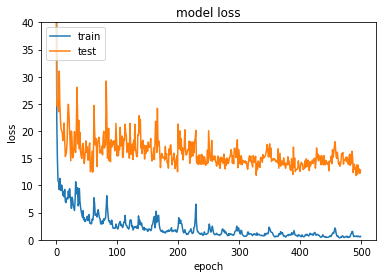

In [105]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0,40])
plt.show()

# Final Model

#### Final model: kernel_initializer='glorot_uniform', activation='relu',  optimizer=Adam(lr=0.01,beta_1=0.97), epochs=300, batch_size=8

In [124]:
K.clear_session()
np.random.seed(seed) 
# train (and evaluate) model
model = Sequential()
model.add(Dense(60, kernel_initializer='glorot_uniform',
                input_shape=(X_train.shape[1],), activation='relu'))                    
model.add(Dense(60, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(30, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.01,beta_1=0.97), loss='mean_squared_error')
model.fit(X_train, y_train, validation_data=(X_test,y_test), 
                    epochs=300, batch_size=8, verbose=0)

#evaluate model on train set
print('MSE of train set: {:0.3f}'.format(mean_squared_error(y_train,model.predict(X_train))))
print('R^2 of train set: {:0.3f}'.format(r2_score(y_train,model.predict(X_train))))

MSE of train set: 1.230
R^2 of train set: 0.984


** Save and load the final model to JSON or YAML ** https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model

** 1) JSON **

In [126]:
# save model as JSON
filename = 'model'
# model architecture
model_json = model.to_json()
with open(filename+'.json', 'w') as json_file:
    json_file.write(model_json)
# model weghts
model.save(filename+'.h5')
print('Saved model in',filename+'.json,',filename+'.h5')

Saved model in model.json, model.h5


In [92]:
#del model

In [127]:
#load model from JSON
filename = 'model'
# model architecture
from keras.models import model_from_json
json_file = open(filename+'.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
# model weghts
model.load_weights(filename+'.h5')
print('Loaded model from',filename+'.json,',filename+'.h5')
print(model.summary())

Loaded model from model.json, model.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                840       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 6,361
Trainable params: 6,361
Non-trainable params: 0
_________________________________________________________________
None


In [128]:
#evaluate model on train set
print('MSE of train set: {:0.3f}'.format(mean_squared_error(y_train,model.predict(X_train))))
print('R^2 of train set: {:0.3f}'.format(r2_score(y_train,model.predict(X_train))))

MSE of train set: 1.230
R^2 of train set: 0.984


** 2) YAML **

In [129]:
# save model as YAML
filename = 'model'
# model architecture
model_yaml= model.to_yaml()
with open(filename+'.yaml', 'w') as yaml_file:
    yaml_file.write(model_yaml)
# model weghts
model.save(filename+'.h5')
print('Saved model in',filename+'.yaml,',filename+'.h5')

Saved model in model.yaml, model.h5


In [130]:
#load model from YAML
filename = 'model'
# model architecture
from keras.models import model_from_yaml
yaml_file = open(filename+'.json', 'r')
model_yaml = yaml_file.read()
yaml_file.close()
model = model_from_yaml(model_yaml)
# model weghts
model.load_weights(filename+'.h5')
print('Loaded model from',filename+'.yaml,',filename+'.h5')
print(model.summary())

Loaded model from model.yaml, model.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                840       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 6,361
Trainable params: 6,361
Non-trainable params: 0
_________________________________________________________________
None


In [131]:
#evaluate model on train set
print('MSE of train set: {:0.3f}'.format(mean_squared_error(y_train,model.predict(X_train))))
print('R^2 of train set: {:0.3f}'.format(r2_score(y_train,model.predict(X_train))))

MSE of train set: 1.230
R^2 of train set: 0.984


## Model Evaluation with Test set

In [132]:
# predict class with test set (new, unseen)
y_pred = model.predict(X_test,verbose=0)
print('MSE of test set: {:0.3f}'.format(mean_squared_error(y_test,y_pred)))
print('R^2 of test set: {:0.3f}'.format(r2_score(y_test,y_pred)))

MSE of test set: 13.112
R^2 of test set: 0.883


Text(0,0.5,'Predicted')

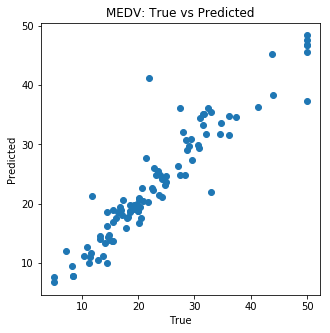

In [133]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.title('MEDV: True vs Predicted')
plt.xlabel('True')
plt.ylabel('Predicted')

Text(0.5,1,'MEDV: Error Distribution')

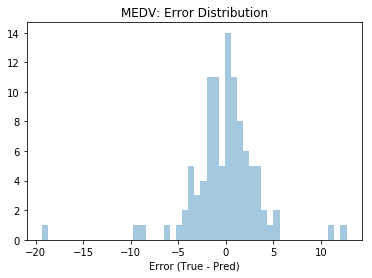

In [134]:
sns.distplot((y_test-y_pred.ravel()), bins=50, kde=False, axlabel='Error (True - Pred)')
plt.title('MEDV: Error Distribution')

# Summary

- Model Architecture: 3 hidden layers (60,60,60 nodes for each layer)


- Best params: kernel_initializer='glorot_uniform',activation='relu',
    optimizer=Adam(lr=0.01,beta_1=0.97),epochs=300, batch_size=8


- MSE / R2 score of test set: ** 13.1 / 0.88 **